In [1]:
from pathlib import Path

In [2]:
import xarray as xr
import numpy as np

In [3]:
data_location = Path("/Volumes/project/amp/brianpm/TemperatureExtremes/Derived")
data_file = data_location / 'CPC_tmax_90pct_event_attributes_compressed.nc'

In [4]:
ds = xr.open_dataset(data_file)
ds

<xarray.Dataset>
Dimensions:        (events: 1202, lat: 360, lon: 720)
Coordinates:
  * events         (events) int64 1 2 3 4 5 6 ... 1197 1198 1199 1200 1201 1202
  * lat            (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
Data variables:
    Event_ID       (events, lat, lon) float64 ...
    initial_index  (events, lat, lon) float64 ...
    duration       (events, lat, lon) float64 ...

In [6]:
B = ds.sel(lat=40, lon=360-105, method='nearest')

In [10]:
B['Event_ID'].max() # number of events at this point

duration = B['duration'].where(B['Event_ID'] != 0)

In [16]:
import matplotlib.pyplot as plt

In [22]:
h = np.histogram(duration[duration!=np.nan], bins=np.linspace(0.5, 21.5, 22))

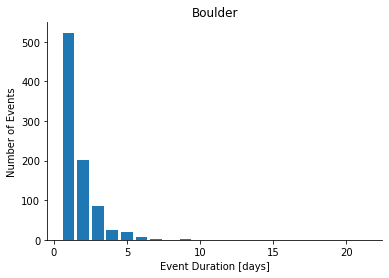

In [29]:
fig, ax = plt.subplots()
ax.bar( np.linspace(1, 21, 21), h[0])
ax.set_title("Boulder")
ax.set_ylabel("Number of Events")
ax.set_xlabel("Event Duration [days]")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [31]:
# How would we then get the magnitudes of these events? 
# Have to use "initial_index" and "duration" to sample the original data. 
tmax_dataset = xr.open_mfdataset('/Volumes/project/amp/jcaron/CPC_Tminmax/tmax.*.nc', combine='by_coords')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [34]:
tmax = tmax_dataset['tmax'].sel(lat=40, lon=360-105, method='nearest')
print(f"The shape of this Tmax subset is {tmax.shape}. The minimum and maximum values in the subset are {tmax.max().values} and {tmax.min().values}.")

The shape of this Tmax subset is (14736,). The minimum and maximum values in the subset are 39.86430740356445 and -22.91572380065918.


In [86]:
# construct a dictionary with all the events:
# key will be event ID values will be the tmax data for the event
events = zip(B['initial_index'][B['Event_ID'] != 0].values.astype(int), B['duration'][B['Event_ID'] != 0].values.astype(int))
event_data = dict()
# construct another dictionary at the same time to get the magnitude
magnitude = dict()
for i, event in enumerate(events):
    event_data[i] = tmax.isel(time=slice(event[0], event[0]+event[1])).values
    if event[1] > 1:
        magnitude[i] = event_data[i].max() - event_data[i].min()
        print(f"Multiday event at number {i} starts at time {event[0]}  which is {tmax['time'][event[0]].values} with duration {event[1]} days and magnitude {magnitude[i]}.")



Multiday event at number 13 starts at time 703  which is 1980-12-04T00:00:00.000000000 with duration 2 days and magnitude 1.6584014892578125.
Multiday event at number 14 starts at time 710  which is 1980-12-11T00:00:00.000000000 with duration 2 days and magnitude 0.5739402770996094.
Multiday event at number 15 starts at time 714  which is 1980-12-15T00:00:00.000000000 with duration 3 days and magnitude 2.526754379272461.
Multiday event at number 16 starts at time 724  which is 1980-12-25T00:00:00.000000000 with duration 5 days and magnitude 5.505069732666016.
Multiday event at number 19 starts at time 752  which is 1981-01-22T00:00:00.000000000 with duration 3 days and magnitude 0.8206462860107422.
Multiday event at number 20 starts at time 778  which is 1981-02-17T00:00:00.000000000 with duration 2 days and magnitude 0.006282806396484375.
Multiday event at number 22 starts at time 785  which is 1981-02-24T00:00:00.000000000 with duration 2 days and magnitude 0.5683021545410156.
Multid